##  **1. Introduction** 

Ini Inroduction Final Project

## **2. Import Libraries** 

In [1]:
#import libraries 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

from scipy.stats import boxcox
rcParams['figure.figsize']=10,6

## **3. Data Loading** 

In [2]:
df= pd.read_csv('Ashmore_Dana_Progressif_Nusantara.csv.xls')

In [3]:
df

,Date,Price,Open,High,Low,Change %
0,"Dec 11, 2022","1,655.950","1,650.490","1,661.730","1,650.490",0.97%
1,"Dec 04, 2022","1,640.070","1,687.960","1,687.960","1,640.070",-3.52%
2,"Nov 27, 2022","1,699.840","1,683.230","1,712.490","1,683.230",0.33%
3,"Nov 20, 2022","1,694.210","1,689.510","1,703.630","1,688.780",-0.06%
4,"Nov 13, 2022","1,695.310","1,706.980","1,707.900","1,695.010",-1.54%
...,...,...,...,...,...,...
276,"Aug 06, 2017","1,568.920","1,558.330","1,589.040","1,558.330",0.29%
277,"Jul 30, 2017","1,564.440","1,570.100","1,573.120","1,561.440",-0.07%
278,"Jul 23, 2017","1,565.600","1,558.500","1,565.600","1,556.120",0.47%
279,"Jul 16, 2017","1,558.220","1,569.480","1,571.560","1,558.220",-0.81%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      281 non-null    object
 1   Price     281 non-null    object
 2   Open      281 non-null    object
 3   High      281 non-null    object
 4   Low       281 non-null    object
 5   Change %  281 non-null    object
dtypes: object(6)
memory usage: 13.3+ KB


In [5]:
col = ['Price',	'Open',	'High',	'Low']

for i in col:

    df[i] = (df[i]
                # .str.replace(".","")
                .str.replace(",","")
                .astype(float)
                )

df['Change %'] = (df['Change %']
                .str.replace("%"," ")
                # .str.replace(",",".")
                .astype(float)
                )

df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      281 non-null    datetime64[ns]
 1   Price     281 non-null    float64       
 2   Open      281 non-null    float64       
 3   High      281 non-null    float64       
 4   Low       281 non-null    float64       
 5   Change %  281 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 13.3 KB


In [7]:
df

,Date,Price,Open,High,Low,Change %
0,2022-12-11,1655.95,1650.49,1661.73,1650.49,0.97
1,2022-12-04,1640.07,1687.96,1687.96,1640.07,-3.52
2,2022-11-27,1699.84,1683.23,1712.49,1683.23,0.33
3,2022-11-20,1694.21,1689.51,1703.63,1688.78,-0.06
4,2022-11-13,1695.31,1706.98,1707.90,1695.01,-1.54
...,...,...,...,...,...,...
276,2017-08-06,1568.92,1558.33,1589.04,1558.33,0.29
277,2017-07-30,1564.44,1570.10,1573.12,1561.44,-0.07
278,2017-07-23,1565.60,1558.50,1565.60,1556.12,0.47
279,2017-07-16,1558.22,1569.48,1571.56,1558.22,-0.81


## **4. EDA (Exploratory Data Analysis)**

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For all the columns')

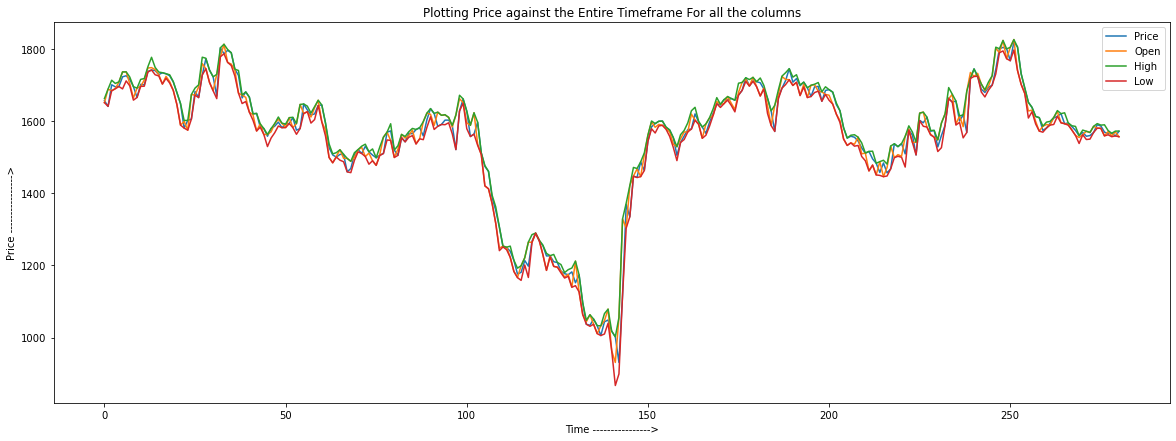

In [8]:
df[['Price','Open',	'High',	'Low']].plot(figsize=(20,7))
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For all the columns")

In [9]:
df = df.sort_values(['Date'],ascending=True).reset_index()

In [10]:
df

,index,Date,Price,Open,High,Low,Change %
0,280,2017-07-09,1570.97,1555.96,1571.70,1555.96,0.40
1,279,2017-07-16,1558.22,1569.48,1571.56,1558.22,-0.81
2,278,2017-07-23,1565.60,1558.50,1565.60,1556.12,0.47
3,277,2017-07-30,1564.44,1570.10,1573.12,1561.44,-0.07
4,276,2017-08-06,1568.92,1558.33,1589.04,1558.33,0.29
...,...,...,...,...,...,...,...
276,4,2022-11-13,1695.31,1706.98,1707.90,1695.01,-1.54
277,3,2022-11-20,1694.21,1689.51,1703.63,1688.78,-0.06
278,2,2022-11-27,1699.84,1683.23,1712.49,1683.23,0.33
279,1,2022-12-04,1640.07,1687.96,1687.96,1640.07,-3.52


In [11]:
new_df=df[['Date','High','Low']]

In [12]:
new_df=new_df.set_index(['Date'])

In [13]:
new_df

,High,Low
Date,,
2017-07-09,1571.70,1555.96
2017-07-16,1571.56,1558.22
2017-07-23,1565.60,1556.12
2017-07-30,1573.12,1561.44
2017-08-06,1589.04,1558.33
...,...,...
2022-11-13,1707.90,1695.01
2022-11-20,1703.63,1688.78
2022-11-27,1712.49,1683.23


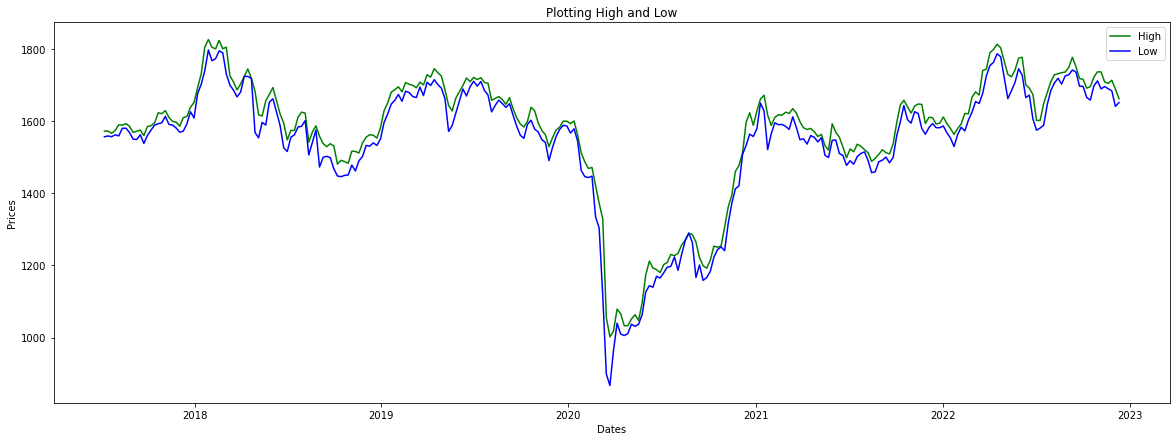

In [14]:
plt.figure(figsize=(20,7))
plt.plot(new_df['High'], color='green', label='High')
plt.plot(new_df['Low'], color='blue', label='Low')
plt.title('Plotting High and Low')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## **5. Data Preprocessing**

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1152x648 with 0 Axes>

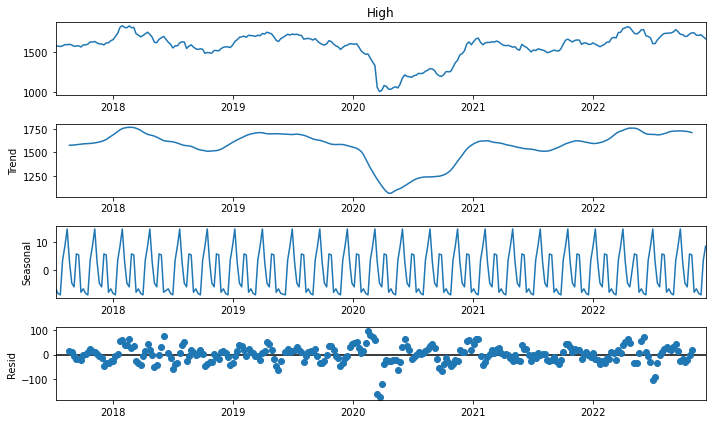

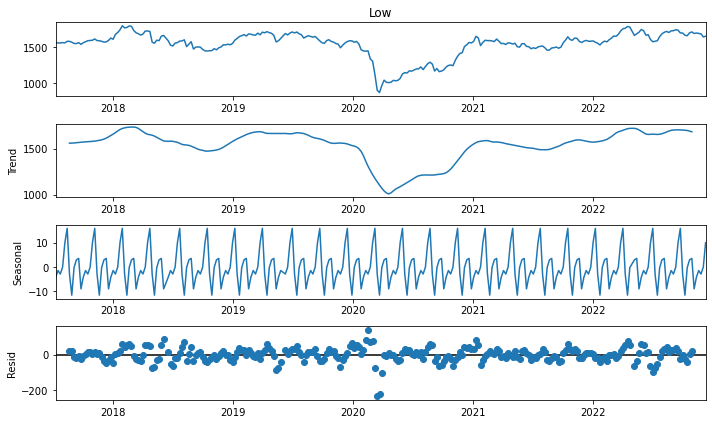

In [16]:
fig = plt.figure() 
fig.set_size_inches(16, 9)

result_H = seasonal_decompose(new_df['High'], period=12)
result_L = seasonal_decompose(new_df['Low'], period=12)
 
fig = result_H.plot() 
fig = result_L.plot() 

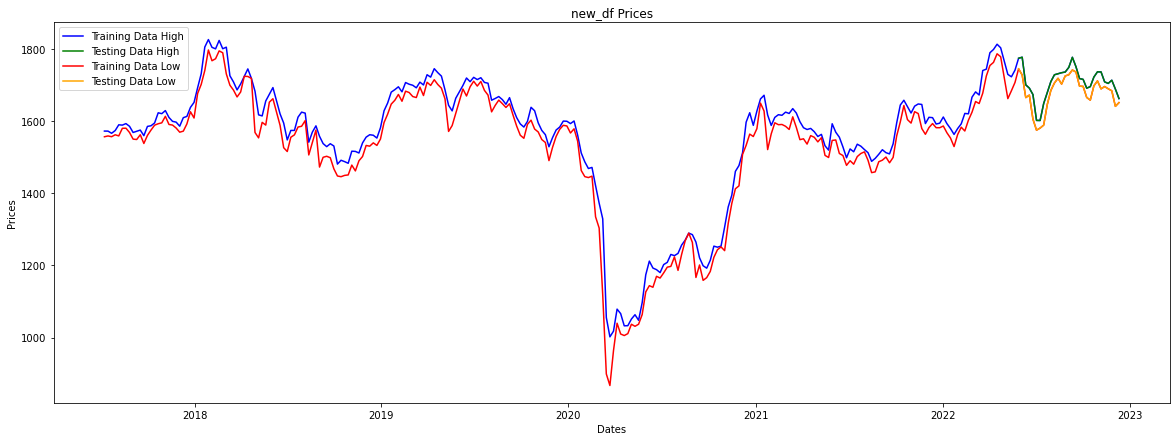

In [17]:
train_data, test_data = new_df[0:int(len(new_df)*0.9)], new_df[int(len(new_df)*0.9):]


plt.figure(figsize=(20,7))
plt.title('new_df Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(new_df['High'], 'blue', label='Training Data High')
plt.plot(test_data['High'], 'green', label='Testing Data High')
plt.plot(new_df['Low'], 'red', label='Training Data Low')
plt.plot(test_data['Low'], 'orange', label='Testing Data Low')
plt.legend()

In [18]:
train_data

,High,Low
Date,,
2017-07-09,1571.70,1555.96
2017-07-16,1571.56,1558.22
2017-07-23,1565.60,1556.12
2017-07-30,1573.12,1561.44
2017-08-06,1589.04,1558.33
...,...,...
2022-04-17,1812.15,1785.67
2022-04-24,1802.24,1777.53
2022-05-08,1728.61,1661.49


In [19]:
test_data

,High,Low
Date,,
2022-05-29,1773.33,1744.31
2022-06-05,1776.19,1726.81
2022-06-12,1699.69,1664.38
2022-06-19,1690.60,1671.29
2022-06-26,1672.78,1604.85
2022-07-03,1601.22,1574.19
2022-07-10,1601.03,1579.97
2022-07-17,1648.10,1588.18
2022-07-24,1678.13,1645.20


## **6. Modeling**

### **6.1 Model Definition**

We will use ARIMA for the time series prediction

### **6.2 Model Training**

In [20]:
!pip install pmdarima

In [21]:
from pmdarima.arima import auto_arima

model_autoARIMA_High = auto_arima(new_df['High'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=2886.167, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=2765.883, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=2865.715, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=2749.325, Time=0.16 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=2741.541, Time=0.30 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=2732.229, Time=0.36 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=2722.717, Time=0.57 sec
 ARIMA(1,1,0)(5,1,1)[4]             : AIC=inf, Time=2.34 sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=2746.991, Time=0.43 sec
 ARIMA(2,1,0)(5,1,0)[4]             : AIC=2724.386, Time=0.84 sec
 ARIMA(1,1,1)(5,1,0)[4]             : AIC=2724.459, Time=1.17 sec
 ARIMA(0,1,1)(5,1,0)[4]             : AIC=2723.845, Time=1.03 sec
 ARIMA(2,1,1)(5,1,0)[4]             : AIC=2726.2

In [22]:
model_autoARIMA_Low = auto_arima(new_df['Low'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=2985.475, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=2878.998, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=2974.113, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=2858.689, Time=0.25 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=2845.133, Time=0.33 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=2827.853, Time=0.44 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=2822.682, Time=0.61 sec
 ARIMA(1,1,0)(5,1,1)[4]             : AIC=inf, Time=1.04 sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=2833.630, Time=0.49 sec
 ARIMA(2,1,0)(5,1,0)[4]             : AIC=2824.541, Time=0.60 sec
 ARIMA(1,1,1)(5,1,0)[4]             : AIC=2824.565, Time=5.60 sec
 ARIMA(0,1,1)(5,1,0)[4]             : AIC=2822.823, Time=1.82 sec
 ARIMA(2,1,1)(5,1,0)[4]             : AIC=2826.4

In [23]:
import warnings
warnings.filterwarnings(action='ignore')

In [24]:
# High

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_High = train_data['High'].values
test_ar_High = test_data['High'].values

history_High = [x for x in train_ar_High]
print(type(history_High))
predictions_High = list()
for t in range(len(test_ar_High)):
    model_High = ARIMA(history_High, order=(5,1,0))
    model_fit = model_High.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_High.append(yhat)
    obs = test_ar_High[t]
    history_High.append(obs)


<class 'list'>


In [25]:
# Low

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_Low = train_data['Low'].values
test_ar_Low = test_data['Low'].values

history_Low = [x for x in train_ar_Low]
print(type(history_Low))
predictions_Low = list()
for t in range(len(test_ar_Low)):
    model_Low = ARIMA(history_Low, order=(5,1,0))
    model_fit = model_Low.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_Low.append(yhat)
    obs = test_ar_Low[t]
    history_Low.append(obs)


<class 'list'>


### **6.3 Model Evaluasi**

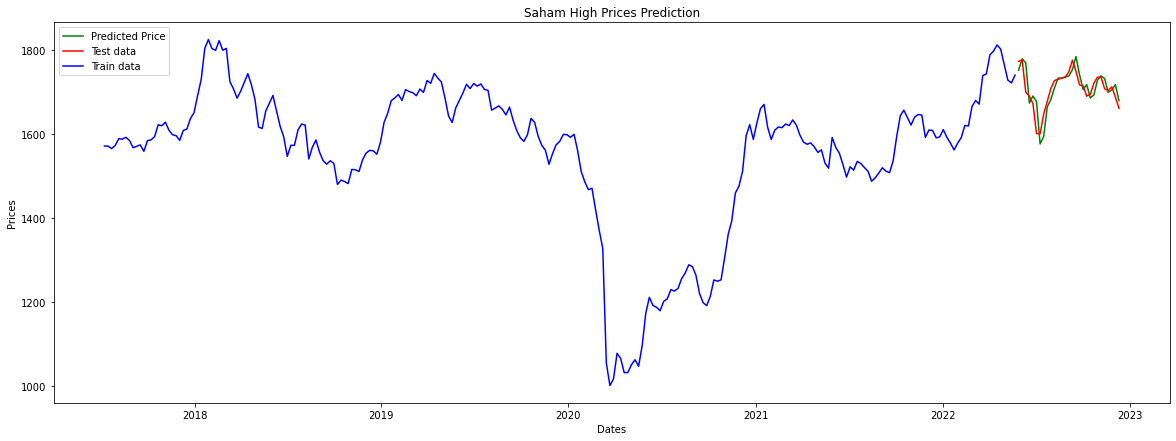

In [26]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_High, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["High"], color='red', label='Test data')
plt.plot(train_data.index, train_data["High"], color='blue', label='Train data')
plt.title('Saham High Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

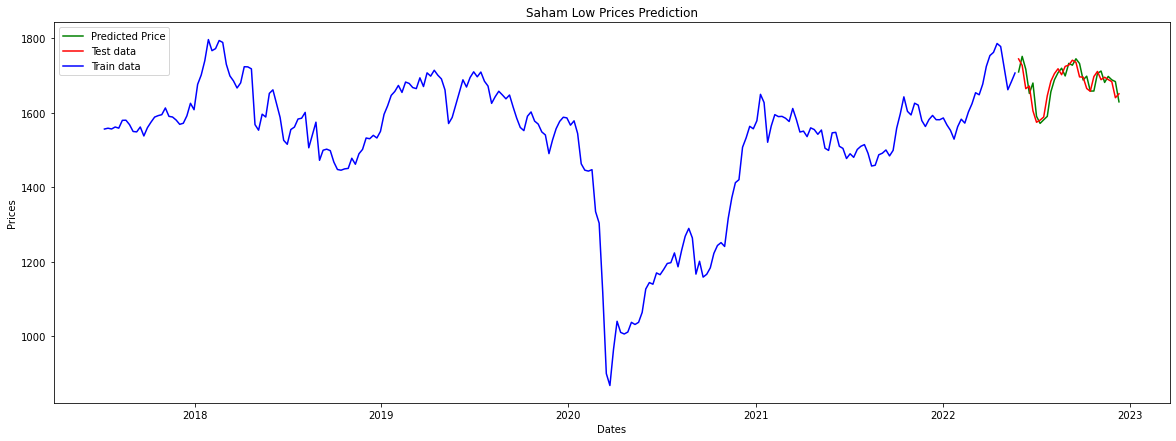

In [27]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_Low, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["Low"], color='red', label='Test data')
plt.plot(train_data.index, train_data["Low"], color='blue', label='Train data')
plt.title('Saham Low Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [28]:
# High

actual_High=pd.DataFrame()
actual_High=pd.DataFrame(test_ar_High,columns=["Actual_High"])
predicted_High=pd.DataFrame(list(predictions_High),columns=["Predicted_High"])
actual_High=actual_High.reset_index(drop=True)
predicted_High=predicted_High.reset_index(drop=True)
output_High=pd.concat([actual_High,predicted_High],axis=1)

# Low

actual_Low=pd.DataFrame()
actual_Low=pd.DataFrame(test_ar_Low,columns=["Actual_Low"])
predicted_Low=pd.DataFrame(list(predictions_Low),columns=["Predicted_Low"])
actual_Low=actual_Low.reset_index(drop=True)
predicted_Low=predicted_Low.reset_index(drop=True)
output_Low=pd.concat([actual_Low,predicted_Low],axis=1)

output = pd.concat([output_High, output_Low], axis=1)
output

,Actual_High,Predicted_High,Actual_Low,Predicted_Low
0,1773.33,1752.243686,1744.31,1709.244423
1,1776.19,1779.232737,1726.81,1751.102466
2,1699.69,1769.744493,1664.38,1716.757669
3,1690.60,1673.930383,1671.29,1651.599716
4,1672.78,1690.807246,1604.85,1679.513337
5,1601.22,1677.382406,1574.19,1590.132175
6,1601.03,1576.708430,1579.97,1571.153286
7,1648.10,1594.416643,1588.18,1580.751161
8,1678.13,1665.094209,1645.20,1589.992158
9,1708.71,1682.359103,1684.27,1655.853221


In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [31]:
# High

MEAN_High = new_df['High'].mean()
MAE_High = mean_absolute_error(output['Actual_High'], output['Predicted_High'])
MSE_High = mean_squared_error(output['Actual_High'], output['Predicted_High'])
RMSE_High = np.sqrt(mean_squared_error(output['Actual_High'], output['Predicted_High']))
MAPE_High = mean_absolute_percentage_error(output['Actual_High'], output['Predicted_High'])

# Low

MEAN_Low = new_df['Low'].mean()
MAE_Low = mean_absolute_error(output['Actual_Low'], output['Predicted_Low'])
MSE_Low = mean_squared_error(output['Actual_Low'], output['Predicted_Low'])
RMSE_Low = np.sqrt(mean_squared_error(output['Actual_Low'], output['Predicted_Low']))
MAPE_Low = mean_absolute_percentage_error(output['Actual_Low'], output['Predicted_Low'])

In [32]:
nilai = [MEAN_High,MAE_High,MSE_High,RMSE_High,MAPE_High,MEAN_Low,MAE_Low,MSE_Low,RMSE_Low,MAPE_Low]
MEAN = []
MAE = []
MSE = []
RMSE = []
MAPE = []
for i in nilai:
    MEAN.append(MEAN_High)
    MAE.append(MAE_High)
    MSE.append(MSE_High)
    RMSE.append(RMSE_High)
    MAPE.append(MAPE_High)
    MEAN.append(MEAN_Low)
    MAE.append(MAE_Low)
    MSE.append(MSE_Low)
    RMSE.append(RMSE_Low)
    MAPE.append(MAPE_Low)
predict = ['High','Low']
score = pd.DataFrame(predict)
score.rename(columns={0:'Predict'},inplace = True)
score['MEAN']= (MEAN_High,MEAN_Low)
score['MAE']= (MAE_High,MAE_Low)
score['MSE']= (MSE_High,MSE_Low)
score['RMSE']=(RMSE_High,RMSE_Low)
score['MAPE']=(MAPE_High,MAPE_Low)

score

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,High,1569.308256,20.802730,774.969765,27.838279,0.012328
1,Low,1538.351779,22.645003,812.820933,28.510015,0.013553


## **7. Prediction**

In [33]:
# Create date for the predicted month
index_new = pd.DataFrame(pd.date_range('2022-12-18', periods=4, freq='W').to_period('D'), columns=['Date'])
index_new = pd.DataFrame(index_new['Date'].dt.to_timestamp(freq='W'))
index_new

,Date
0,2022-12-18
1,2022-12-25
2,2023-01-01
3,2023-01-08


In [34]:
# High

result_High =  model_High.fit()
  
# Forecast for the next 4 week
forecast_High = result_High.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_High = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_High,columns=["Forecast"])], axis=1).set_index(["Date"])
forecast_High

,Forecast
Date,
2022-12-18,1675.017238
2022-12-25,1674.963957
2023-01-01,1675.356162
2023-01-08,1673.777647


In [35]:
# Low

result_Low =  model_Low.fit()
  
# Forecast for the next 4 week
forecast_Low = result_Low.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_Low = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_Low,columns=["Forcast"])], axis=1).set_index(["Date"])
forecast_Low

,Forcast
Date,
2022-12-18,1629.803558
2022-12-25,1630.483093
2023-01-01,1631.034728
2023-01-08,1629.635084


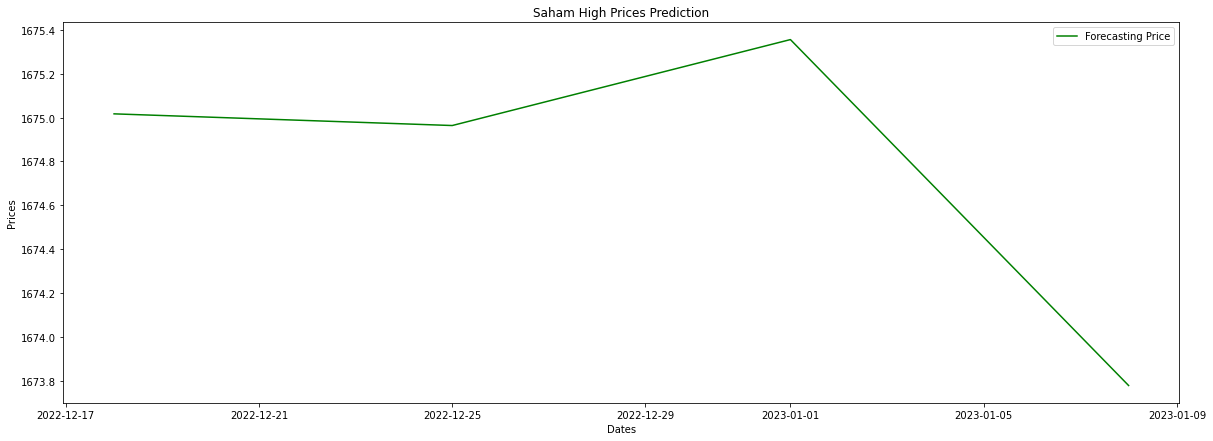

In [36]:
plt.figure(figsize=(20,7))
plt.plot(forecast_High, color='green', label='Forecasting Price')
plt.title('Saham High Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

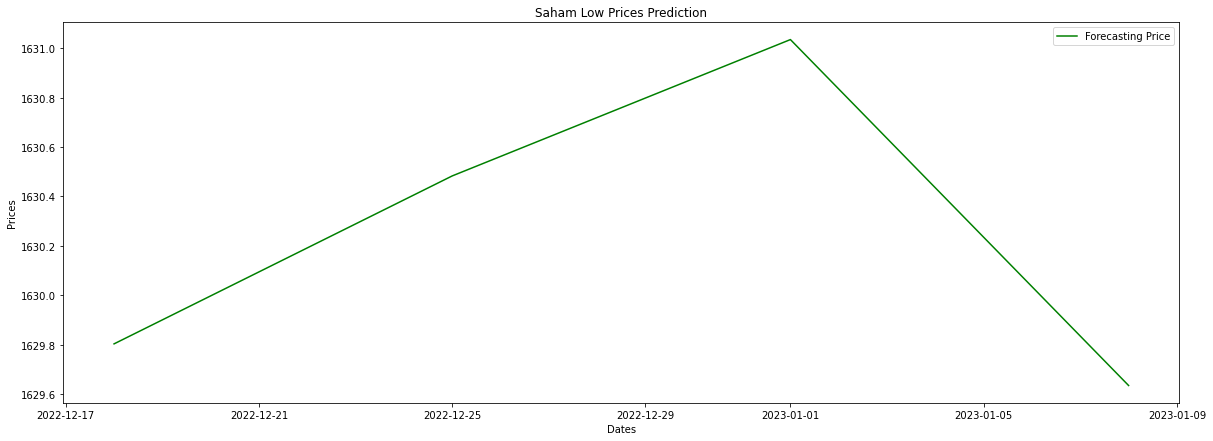

In [37]:
plt.figure(figsize=(20,7))
plt.plot(forecast_Low, color='green', label='Forecasting Price')
plt.title('Saham Low Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()